In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('ai_dataset.csv')

# Check the first few rows of the dataset
print(df.head())

# Check for missing values and data types
print(df.info())


               Job_Title            Industry AI Adoption Level  \
0  Cybersecurity Analyst              Retail              High   
1          AI Researcher              Energy               Low   
2          AI Researcher              Retail            Medium   
3          AI Researcher  Telecommunications              High   
4          AI Researcher      Transportation              High   

   AI Adoption Score Automation Risk  Automation Risk Score   Required_Skills  \
0                  3            High                      3     Cybersecurity   
1                  1            High                      3  Machine Learning   
2                  2            High                      3     Data Analysis   
3                  3            High                      3             Sales   
4                  3            High                      3        JavaScript   

   Salary (USD) Job Growth Projection  Job Growth Score  Unnamed: 10  \
0   $75,862.86                 Growth       

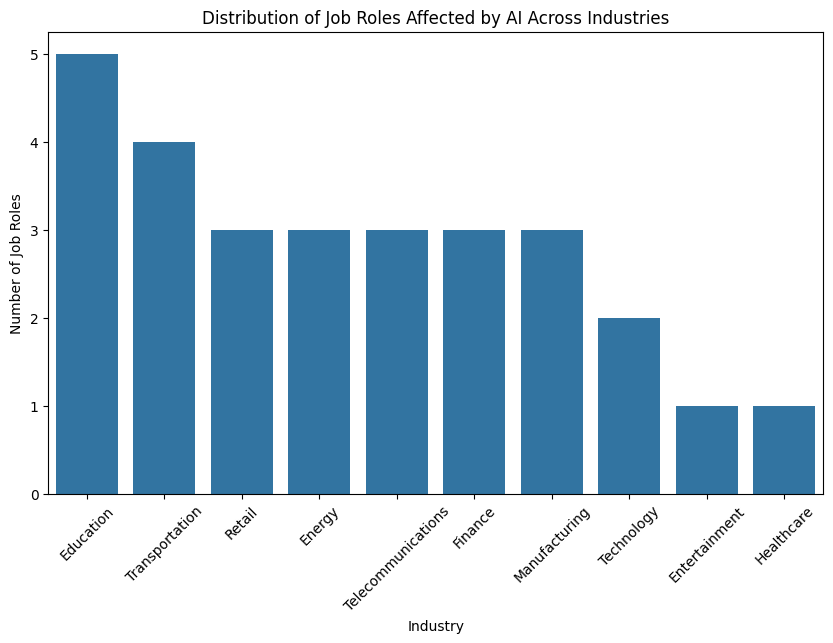

In [3]:
#To understand how different industries or job roles are affected by AI, we can create a bar chart or pie chart.
#For this, group the data by job roles or industries and plot the frequency.

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Industry' and 'Job_Role' are columns in your dataset
industry_counts = df['Industry'].value_counts()

# Plot the distribution of job roles across industries
plt.figure(figsize=(10, 6))
sns.barplot(x=industry_counts.index, y=industry_counts.values)
plt.title('Distribution of Job Roles Affected by AI Across Industries')
plt.xlabel('Industry')
plt.ylabel('Number of Job Roles')
plt.xticks(rotation=45)
plt.show()


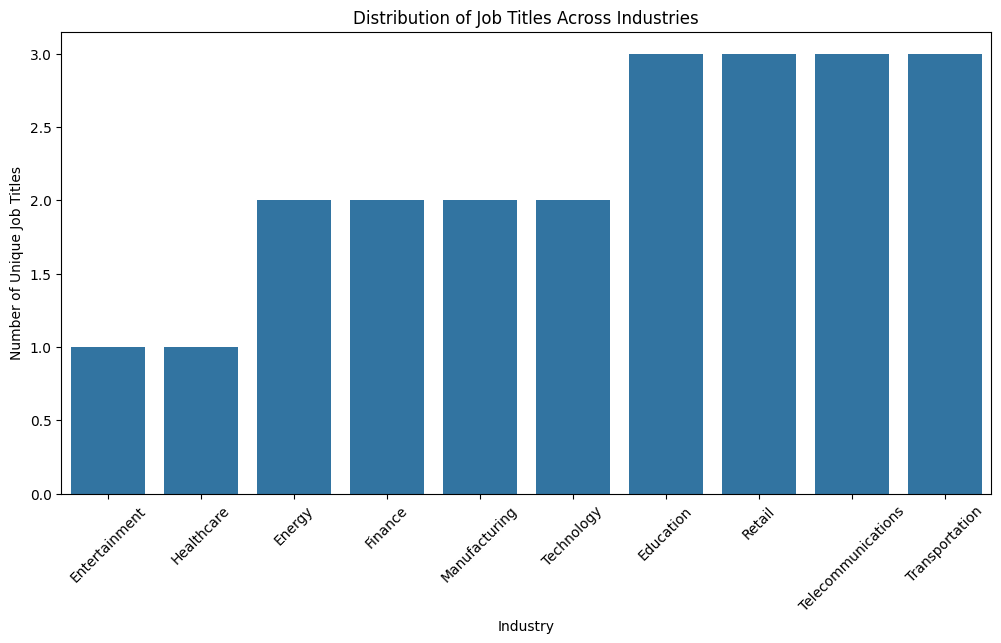

In [4]:
#To understand the distribution of job titles across industries, we can use a bar plot:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of job titles per industry
job_title_count_by_industry = df.groupby('Industry')['Job_Title'].nunique().sort_values()

# Plot the distribution of job titles by industry
plt.figure(figsize=(12, 6))
sns.barplot(x=job_title_count_by_industry.index, y=job_title_count_by_industry.values)
plt.title('Distribution of Job Titles Across Industries')
plt.xlabel('Industry')
plt.ylabel('Number of Unique Job Titles')
plt.xticks(rotation=45)
plt.show()


Healthcare in dataset: True
Number of unique industries: 10
List of unique industries: ['Retail' 'Energy' 'Telecommunications' 'Transportation' 'Entertainment'
 'Finance' 'Manufacturing' 'Education' 'Technology' 'Healthcare']
Healthcare in cleaned dataset: True


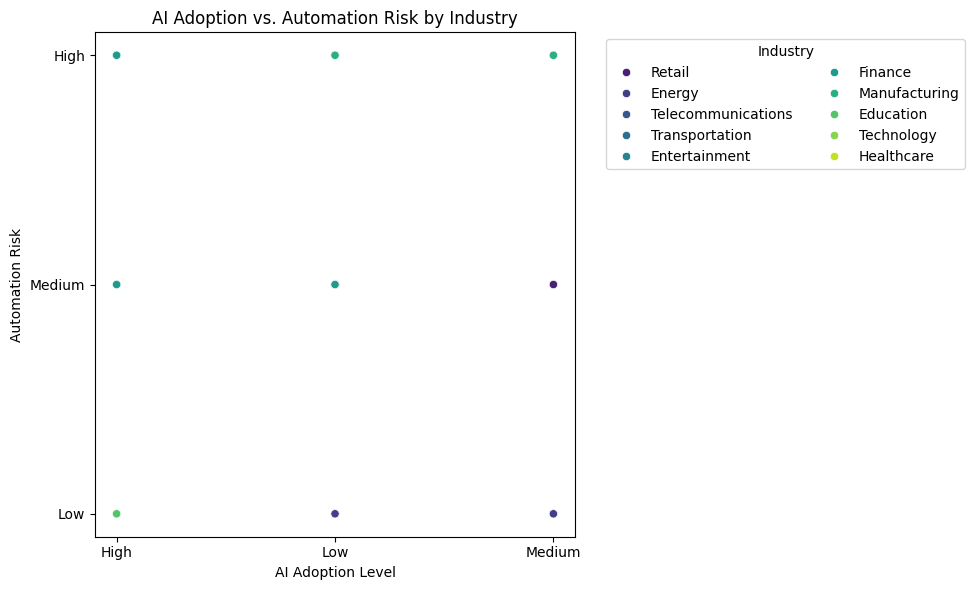

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure that the 'Industry' column is clean and doesn't have any inconsistencies
df['Industry'] = df['Industry'].str.strip().str.title()

# Check if 'Healthcare' exists in the dataset
print(f"Healthcare in dataset: {'Healthcare' in df['Industry'].values}")

# Check how many unique industries there are and print them out
print(f"Number of unique industries: {df['Industry'].nunique()}")
print(f"List of unique industries: {df['Industry'].unique()}")

# Drop rows with missing values in the relevant columns (AI Adoption Level, Automation Risk)
df_clean = df.dropna(subset=['AI Adoption Level', 'Automation Risk', 'Industry'])

# Check again if 'Healthcare' is in the dataset after dropping missing values
print(f"Healthcare in cleaned dataset: {'Healthcare' in df_clean['Industry'].values}")

# Scatter plot for AI Adoption vs. Automation Risk by Industry
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AI Adoption Level', y='Automation Risk', data=df_clean, hue='Industry', palette='viridis')

# Customize the plot
plt.title('AI Adoption vs. Automation Risk by Industry')
plt.xlabel('AI Adoption Level')
plt.ylabel('Automation Risk')

# Adjust legend to display all industries correctly
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)

# Ensure everything fits within the plot area
plt.tight_layout()

# Show the plot
plt.show()


In [6]:
!pip install wordcloud

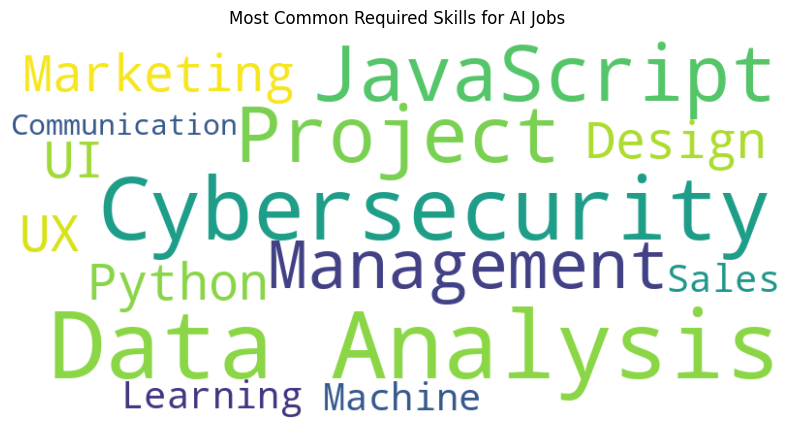

In [7]:
from wordcloud import WordCloud

# Join all the required skills into a single string
skills_text = ' '.join(df['Required_Skills'].dropna().astype(str))

# Generate and display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(skills_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Required Skills for AI Jobs')
plt.show()


Industry        object
Salary (USD)    object
dtype: object
Industry         object
Salary (USD)    float64
dtype: object


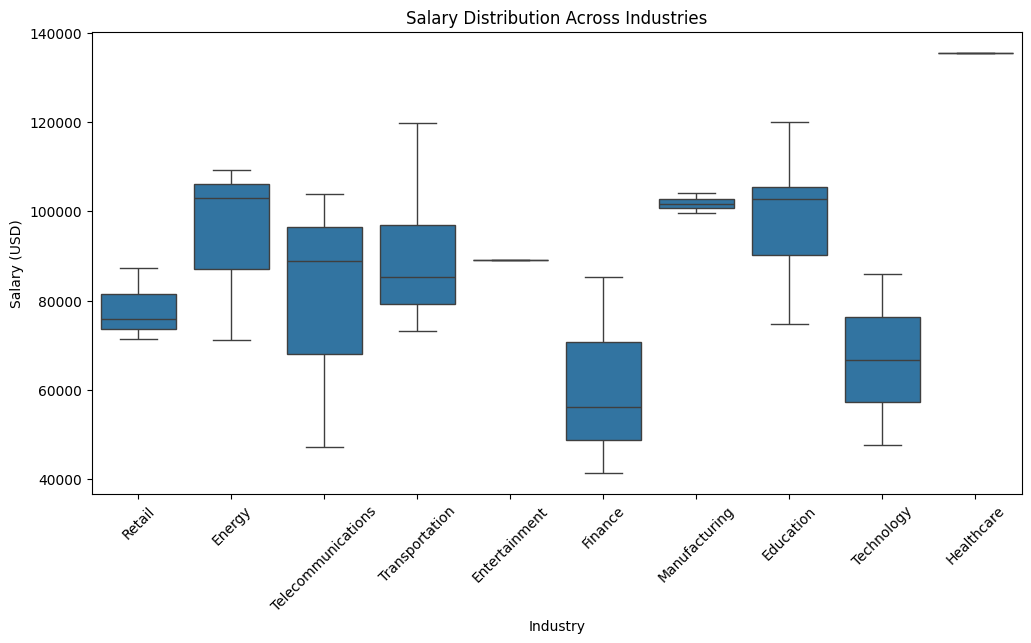

In [8]:
# Boxplot of salaries across industries

print(df[['Industry', 'Salary (USD)']].dtypes)

df['Salary (USD)'] = df['Salary (USD)'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Check if the conversion worked
print(df[['Industry', 'Salary (USD)']].dtypes)

plt.figure(figsize=(12, 6))
sns.boxplot(x='Industry', y='Salary (USD)', data=df)
plt.title('Salary Distribution Across Industries')
plt.xlabel('Industry')
plt.ylabel('Salary (USD)')
plt.xticks(rotation=45)
plt.show()


['Growth' 'Stable' 'Decline']
int64


<ipython-input-9-0e0a678f92f2>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Job Growth Projection'] = df['Job Growth Projection'].replace(growth_map)


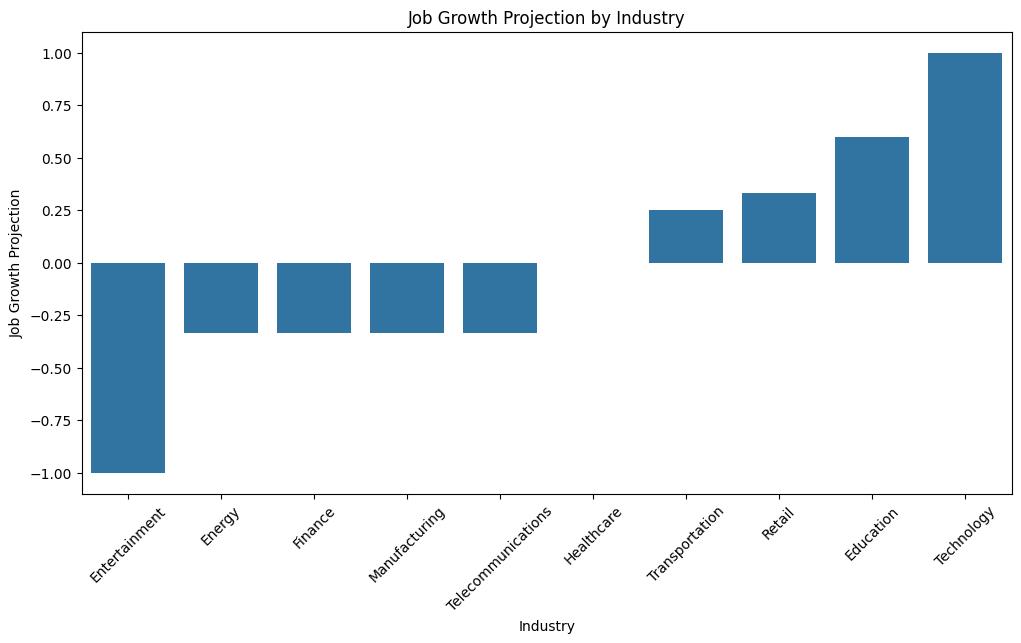

In [9]:
# Check unique values in 'Job Growth Projection'
print(df['Job Growth Projection'].unique())

# Map 'Job Growth Projection' values to numeric scale
growth_map = {
    'Growth': 1,
    'Stable': 0,
    'Decline': -1,
    'GrowthGrowthGrowthStableStable': 1,  # If this is a known string pattern, add it to the mapping
}

df['Job Growth Projection'] = df['Job Growth Projection'].replace(growth_map)

# Now check if the conversion was successful
print(df['Job Growth Projection'].dtype)  # Should show 'int' or 'float'

# Grouping data by Industry and calculating the mean of Job Growth Projection
industry_job_growth = df.groupby('Industry')['Job Growth Projection'].mean().sort_values()

# Bar plot for Job Growth Projection by Industry
plt.figure(figsize=(12, 6))
sns.barplot(x=industry_job_growth.index, y=industry_job_growth.values)
plt.title('Job Growth Projection by Industry')
plt.xlabel('Industry')
plt.ylabel('Job Growth Projection')
plt.xticks(rotation=45)
plt.show()


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare the data for regression
X = df[['AI Adoption Score']]  # Feature: AI Adoption Score
y = df['Automation Risk Score']  # Target: Automation Risk Score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.6500850340136054


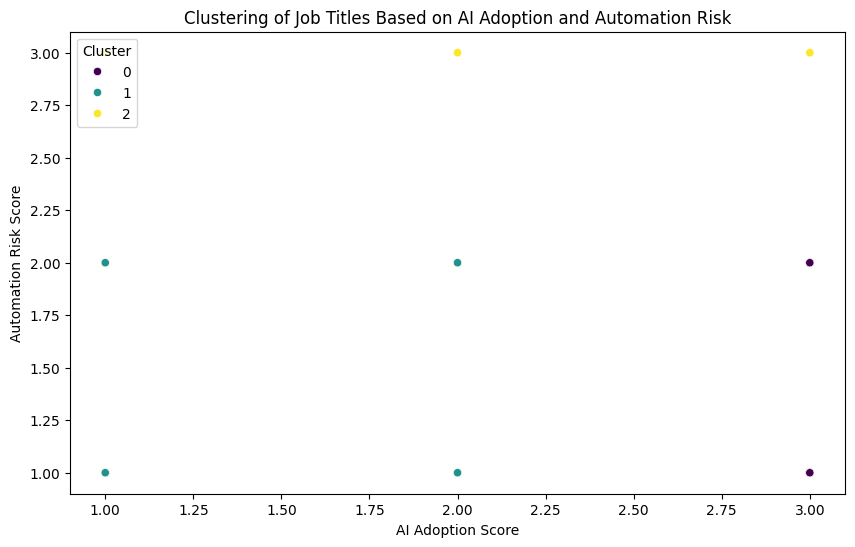

In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering
X = df[['AI Adoption Score', 'Automation Risk Score']]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AI Adoption Score', y='Automation Risk Score', hue='Cluster', data=df, palette='viridis')
plt.title('Clustering of Job Titles Based on AI Adoption and Automation Risk')
plt.xlabel('AI Adoption Score')
plt.ylabel('Automation Risk Score')
plt.show()


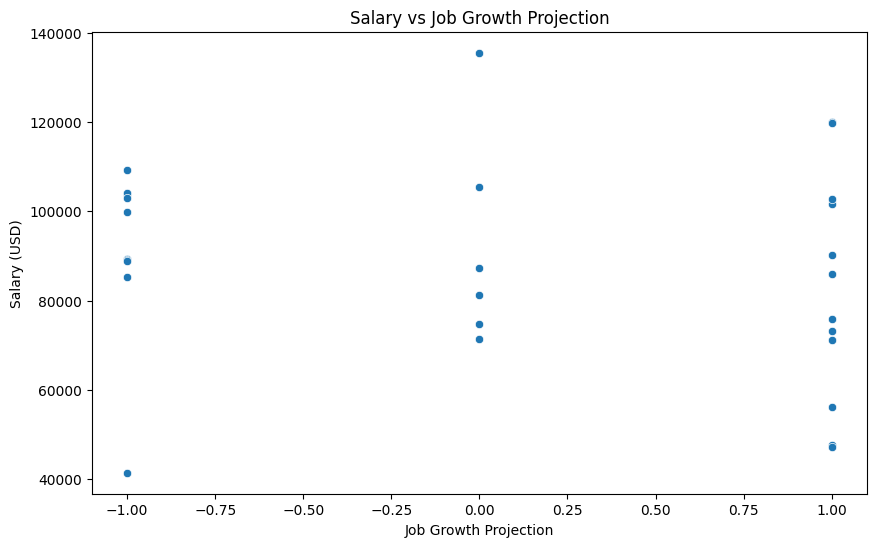

                       Salary (USD)  Job Growth Projection
Salary (USD)               1.000000              -0.178407
Job Growth Projection     -0.178407               1.000000


In [12]:
# Scatter plot of Salary vs. Job Growth Projection
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Job Growth Projection', y='Salary (USD)', data=df)
plt.title('Salary vs Job Growth Projection')
plt.xlabel('Job Growth Projection')
plt.ylabel('Salary (USD)')
plt.show()

# Calculate correlation
correlation = df[['Salary (USD)', 'Job Growth Projection']].corr()
print(correlation)


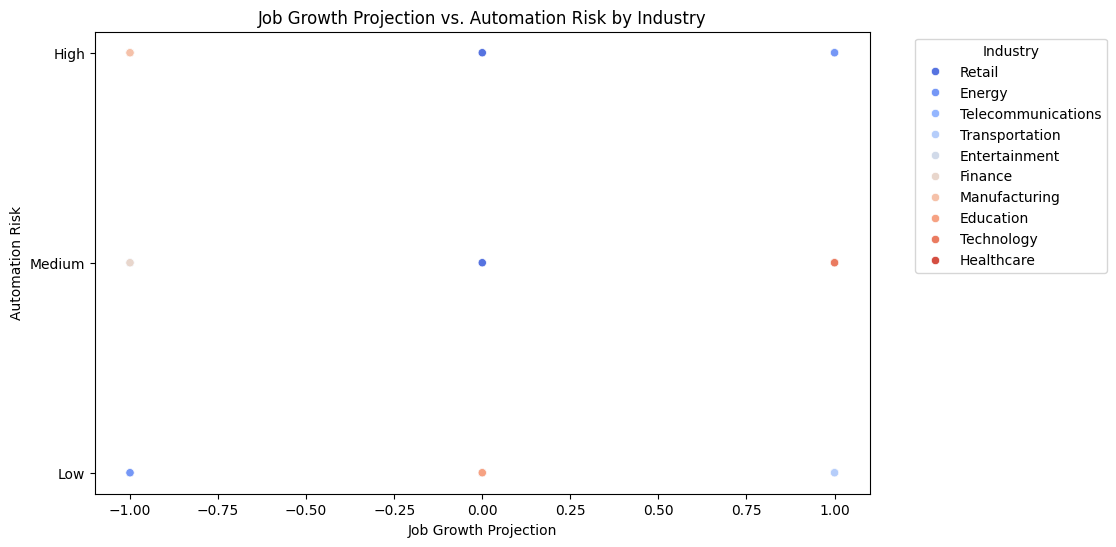

In [13]:
# Scatter plot for Job Growth Projection vs. Automation Risk
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Job Growth Projection', y='Automation Risk', data=df, hue='Industry', palette='coolwarm')
plt.title('Job Growth Projection vs. Automation Risk by Industry')
plt.xlabel('Job Growth Projection')
plt.ylabel('Automation Risk')
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
